In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#data= pd.read_csv()
#https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/mhemmg/NeuralNetworkRSouzaCourse/master/Notebooks/extras/classes_MH/class_15/mnist_test.csv')
data = data.to_numpy()
X_data = data[:, 1:]
y_data = data[:, 0]

from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test)=train_test_split(X_data,y_data,test_size=0.1, random_state=3)



In [4]:
y_data
print('shape of the train dataset:',X_train.shape)


shape of the train dataset: (9000, 784)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten


In [6]:
tf.random.set_seed(1234)

In [7]:
def get_model(input_shape):
    model=Sequential([
                  InputLayer(input_shape=input_shape),
                  Dense(units=16,activation='relu',name='layer_hidden'),
                  Dense(units=10,activation='softmax',name='output_layer')
                 ])
    return model



In [8]:
#model = get_model(X_train[0].shape)

In [9]:
from keras.utils.np_utils import to_categorical   
y_train_tf_one_hot = to_categorical(y_train, num_classes=10)
y_test_tf_one_hot = to_categorical(y_test, num_classes=10)

In [10]:
def compile_model(model):
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'] )
tf.random.set_seed(1234)

In [13]:
image_size = 784 # tamaño de cada imagen  
num_classes = 10 # número de clases
def create_dense(layer_sizes):
    tf.random.set_seed(1234)
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'relu'))
    
    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=64, epochs=5):
    model.summary()
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train_tf_one_hot, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(X_test, y_test_tf_one_hot, verbose=False)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy del modelo')
    plt.ylabel('Accuracy')
    plt.xlabel('Epocas')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    validation_accuracy= (history.history['accuracy'][-1])
    print(f'Max Validation accuracy: {validation_accuracy:.3}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


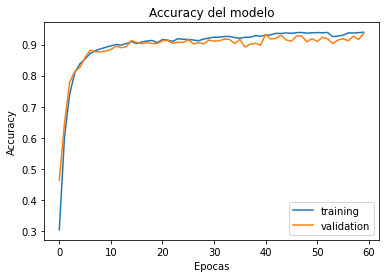


Test loss: 0.25
Test accuracy: 0.912
Validation accuracy: 0.94


In [12]:
layers=3
model = create_dense([64]*layers)
evaluate(model,epochs=60)